In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("../../data/titanic/train.csv",usecols=['Age','Fare','Survived'])

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
df.dropna(inplace=True)

In [7]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [8]:
X = df.iloc[:,1:]
y = df['Survived']
X,y

(      Age     Fare
 0    22.0   7.2500
 1    38.0  71.2833
 2    26.0   7.9250
 3    35.0  53.1000
 4    35.0   8.0500
 ..    ...      ...
 885  39.0  29.1250
 886  27.0  13.0000
 887  19.0  30.0000
 889  26.0  30.0000
 890  32.0   7.7500
 
 [714 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape,X_test.shape,X.shape

((571, 2), (143, 2), (714, 2))

## Without binning

In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [13]:
preds = clf.predict(X_test)

In [14]:
preds

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [15]:
print(accuracy_score(preds,y_test))

0.6223776223776224


In [16]:
np.mean(cross_val_score(clf,X_train,y_train,cv=10,scoring="accuracy"))

np.float64(0.6201149425287357)

## With binning

In [17]:
k_bin_age = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
k_bin_fare = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')

In [18]:
trf = ColumnTransformer([
    ('first',k_bin_age,[0]),
    ('second',k_bin_fare,[1])
])

In [19]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf= trf.transform(X_test)

/home/bigyan/Desktop/projects/EDA/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/bigyan/Desktop/projects/EDA/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [20]:
trf.named_transformers_['first'].n_bins_

array([10])

In [21]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [22]:
X_train_trf

array([[5., 5.],
       [4., 4.],
       [5., 5.],
       ...,
       [7., 9.],
       [6., 5.],
       [6., 2.]], shape=(571, 2))

In [23]:
output = pd.DataFrame(
    {
        'age':X_train['Age'],
        'age_trf':X_train_trf[:,0],
        'fare':X_train['Fare'],
        'fare_trf':X_train_trf[:,1]
    }
)
output

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [24]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [25]:
output.sample(10)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
309,30.00,5.0,56.9292,8.0,"(28.5, 32.0]","(51.479, 82.171]"
658,23.00,3.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
586,47.00,8.0,15.0000,4.0,"(42.0, 50.0]","(13.0, 15.75]"
210,24.00,3.0,7.0500,0.0,"(22.0, 25.0]","(0.0, 7.75]"
543,32.00,6.0,26.0000,6.0,"(28.5, 32.0]","(15.75, 26.0]"
630,80.00,9.0,30.0000,7.0,"(50.0, 80.0]","(29.125, 51.479]"
345,24.00,3.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
216,27.00,4.0,7.9250,2.0,"(25.0, 28.5]","(7.896, 9.225]"
78,0.83,0.0,29.0000,6.0,"(0.42, 14.0]","(26.0, 29.125]"
530,2.00,0.0,26.0000,6.0,"(0.42, 14.0]","(15.75, 26.0]"


In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [27]:
y_preds = clf.predict(X_test_trf)

In [28]:
print(accuracy_score(y_true=y_test,y_pred=y_preds))

0.6223776223776224


In [29]:
np.mean(cross_val_score(clf,X_train_trf,y_train,cv=10,scoring="accuracy"))

np.float64(0.6777979431336962)

In [57]:
def discretize(bins, strategy):
    k_bin_age = KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')
    k_bin_fare = KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')


    trf = ColumnTransformer([
        ('first',k_bin_age,[0]),
        ('second',k_bin_fare,[1])
    ])
    X_trf = trf.fit_transform(X)

    print(np.mean(cross_val_score(clf,X_trf,y,cv=10,scoring="accuracy")))

    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Age Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('Age After')

    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Fare Before')

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('Fare After')
    plt.show()


0.6878129890453833


/home/bigyan/Desktop/projects/EDA/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/bigyan/Desktop/projects/EDA/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


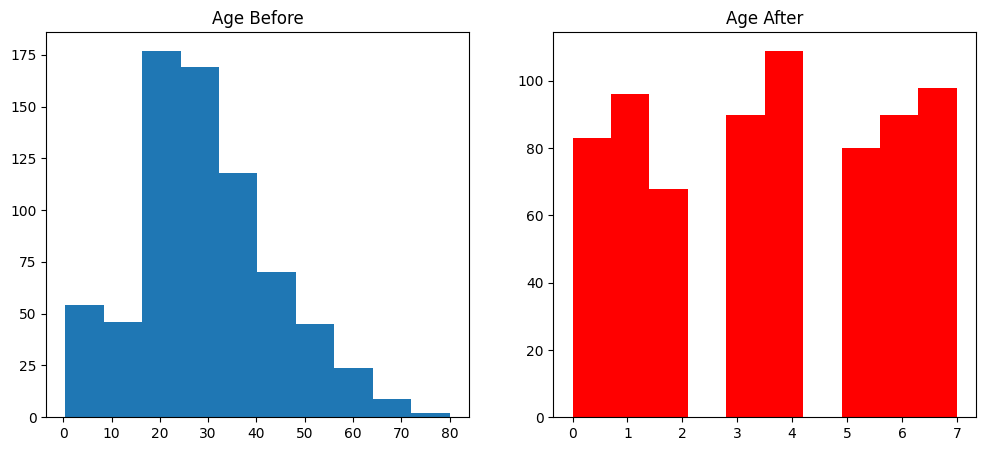

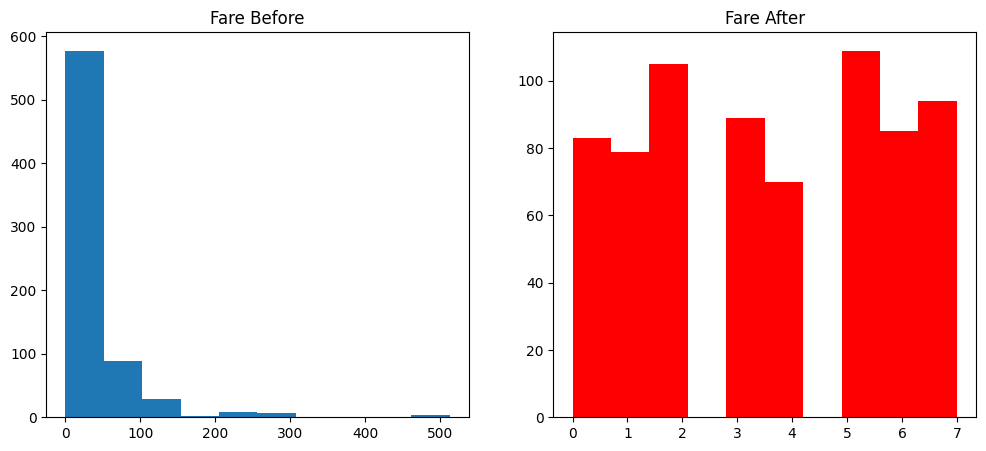

In [58]:
discretize(8,'quantile')